## Import des bibliothèques 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer


### Chargement des dataframe pour le projet

In [94]:
x_train = pd.read_csv(r"./data/x_train.csv")
y_train = pd.read_csv(r"./data/y_train.csv")
x_test = pd.read_csv(r"./data/x_test.csv")

In [95]:
x_train.set_index('ID', inplace=True)
y_train.set_index('ID', inplace=True)
x_test.set_index('ID', inplace=True)

In [96]:
train = pd.concat([x_train, y_train], axis=1)

In [69]:
x_test["intention"] = int(20)

In [97]:
data = pd.concat([train, x_test])

### Début de l'analyse des dataframes

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(8028, 2)
(8028, 2)
(2035, 2)


#### vérification de la présence de doublons

#### Affichage d'un histogrammme pour voir le noombre d'occurence de chaque intention
##### on peut s'apercevoir que l'intention 28 revient très souvent et pourrait biaisé le modèle

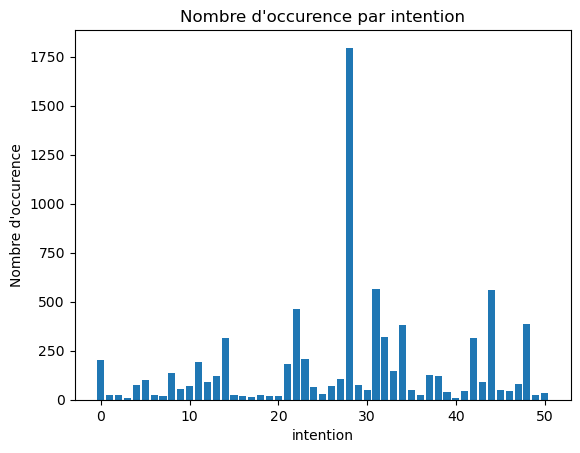

In [4]:
plt.bar(y_train["intention"].value_counts().index, y_train["intention"].value_counts())
plt.xlabel("intention")
plt.ylabel("Nombre d'occurence")
plt.title("Nombre d'occurence par intention")
plt.show()

##### Merging des dataframe x_train et y_train car nous en avons besoin pour l'entrainement du modèle de classification NLP

In [98]:
import string
def remove_punct(text):
    r = ""
    for i in text:
        if i not in string.punctuation:
            r+=i
        else:
            r+=" "
    return r

def add_text_list(text):
    return text.split()

def remove_one_character(liste):
    liste1 = []
    for i in liste:
        if len(i) > 1:
            liste1.append(i)
    return " ".join(liste1)

In [75]:
#data = pd.merge(x_train, y_train, on = "ID", how = "inner")

In [99]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load stopwords and initialize stemmer and lemmatizer
stop_words = set(stopwords.words('french'))  # Assuming you're working with English text
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()



# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing punctuation and stop words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Stemming
    # stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Joining tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NEIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NEIL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [100]:
# Apply preprocessing function to 'question' column
data['question_preprocessed'] = data['question'].apply(preprocess_text)

# Example output
print(data[['question', 'question_preprocessed']])

                                                question  \
ID                                                         
0      bonjour,  je m suis trompé de forum pour ma qu...   
1      est ce que le motilium me soulagera contre les...   
2      mon médecin m'a prescrit adenyl. au 2ème cache...   
3      Est-ce qu'il existe une forme adaptée aux enfa...   
4      mon  medecin  me soigne  pour  une  rhino  pha...   
...                                                  ...   
10058  La pivalone est elle uttilisable chez la femme...   
10059  je suis sous traitement depakote 750 depuis pl...   
10060  est ce que c'est normal d'avoir des règles peu...   
10061  j'ai été vacciné par l'hépatite b (2 injection...   
10062                                prozac et xanax..??   

                                   question_preprocessed  
ID                                                        
0      bonjour trompé forum question alors repose ici...  
1                      motilium soulagera 

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [121]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['question_preprocessed'])
y = data[~data.index.isin(list(x_test.index))]['intention']

indices = data[data.index.isin(list(x_test.index))].index

# Step 3: Select rows from the TF-IDF matrix based on desired indices
X_selected = X[indices]
indices = data[~data.index.isin(list(x_test.index))].index
# Step 3: Select rows from the TF-IDF matrix based on desired indices
X = X[indices] 

In [125]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
model = LogisticRegression(max_iter=1000)  # Example model, you can choose another classifier
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

         0.0       0.93      0.34      0.50        41
         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00         1
         4.0       1.00      0.31      0.47        13
         5.0       0.50      0.05      0.08        22
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00         2
         8.0       0.73      0.41      0.52        27
         9.0       0.00      0.00      0.00         9
        10.0       1.00      0.38      0.55        16
        11.0       0.47      0.20      0.28        35
        12.0       0.67      0.25      0.36         8
        13.0       0.75      0.53      0.62        17
        14.0       0.49      0.48      0.49        56
        15.0       0.50      0.20      0.29         5
        16.0       0.00      0.00      0.00         4
        17.0       0.00    

C:\Users\NEIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEIL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: U

In [152]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Step 2: Train-Test Split

# Step 3: Model Training
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.564134495641345


In [153]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Step 3: Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3275217932752179


In [145]:
# Step 3: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Example Random Forest model
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5940224159402242


In [147]:
X_selected

<2035x9538 sparse matrix of type '<class 'numpy.float64'>'
	with 15747 stored elements in Compressed Sparse Row format>

In [150]:
y_pred_test = model.predict(X_selected)
submission = pd.concat([pd.DataFrame(data[data.index.isin(list(x_test.index))].index), pd.DataFrame(y_pred_test)],axis=1)
submission.columns = ["ID", "intention"]
submission["intention"] = submission["intention"].astype(int)

In [151]:
submission.to_csv("submission.csv", index=False)

In [15]:
data["question_modifier"] = data["question"].apply(remove_punct)
data["question_modifier_1"] = data["question_modifier"].apply(add_text_list)
data["question_modifier_2"] = data["question_modifier_1"].apply(remove_one_character)

In [24]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Assuming you have your preprocessed DataFrame named 'data' with columns 'question_preprocessed' and 'intention'

# Tokenize the preprocessed text
data['tokens'] = data['question_preprocessed'].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Save or use the trained Word2Vec model
# word2vec_model.save("word2vec_model.bin")

# Get word embeddings for each question
def get_embeddings(tokens):
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if embeddings:
        return sum(embeddings) / len(embeddings)  # Average word embeddings for the question
    else:
        return [0] * 100  # Return zero vector if no embeddings found

data['word_embeddings'] = data['tokens'].apply(get_embeddings)

# Example output
print(data[['question_preprocessed', 'word_embeddings', 'intention']])


                                  question_preprocessed  \
0     bonjour trompé forum question alors repose ici...   
1                     motilium soulagera contre nausées   
2     médecin a prescrit adenyl cachet maux tête ter...   
3               existe forme adaptée enfant micropakine   
4     medecin soigne rhino pharingite a prescrit amo...   
...                                                 ...   
8023             combien temp antibio plus présent corp   
8024  fait vacciner revaxis fils dernière alors mois...   
8025  patient a ramené ordonnance pendant otite moye...   
8026        prise pillule lendemain faire pause ensuite   
8027                                   advil médicament   

                                        word_embeddings  intention  
0     [-0.14724894, 0.28584772, 0.011314727, 0.06157...         28  
1     [-0.12514384, 0.22466981, 0.019425359, 0.05682...         31  
2     [-0.118017055, 0.22552599, 0.0128001645, 0.051...         28  
3     [-0.08878

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your DataFrame named 'data' with 'word_embeddings' and 'intention' columns

# Extract features (word embeddings) and target variable
X = data['word_embeddings'].to_list()
y = data['intention']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)


KeyError: 'word_embeddings'

In [27]:

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit the CountVectorizer on the preprocessed text
X_bag_of_words = count_vectorizer.fit_transform(data['question_preprocessed'])

# Convert the sparse matrix to a DataFrame
df_bag_of_words = pd.DataFrame(X_bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())

# Concatenate the bag of words DataFrame with the 'intention' column
df_bag_of_words_with_labels = pd.concat([df_bag_of_words, data['intention']], axis=1)

# Display the bag of words DataFrame
print(df_bag_of_words_with_labels)

      aa  abandonné  abcés  abdo  abdominal  abdominale  abdominales  abies  \
0      0          0      0     0          0           0            0      0   
1      0          0      0     0          0           0            0      0   
2      0          0      0     0          0           0            0      0   
3      0          0      0     0          0           0            0      0   
4      0          0      0     0          0           0            0      0   
...   ..        ...    ...   ...        ...         ...          ...    ...   
8023   0          0      0     0          0           0            0      0   
8024   0          0      0     0          0           0            0      0   
8025   0          0      0     0          0           0            0      0   
8026   0          0      0     0          0           0            0      0   
8027   0          0      0     0          0           0            0      0   

      abigail  abilfy  ...  évidence  évident  évit

In [28]:
# Split the data into features (bag of words) and target variable
X = df_bag_of_words_with_labels.drop(columns=['intention'])
y = df_bag_of_words_with_labels['intention']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

ValueError: multiclass-multioutput is not supported

In [42]:
x_test["question_modifier"] = x_test["question"].apply(remove_punct)
x_test["question_modifier_1"] = x_test["question_modifier"].apply(add_text_list)
x_test["question_modifier_2"] = x_test["question_modifier_1"].apply(remove_one_character)
x_test["question_modifier_2"] = x_test["question_modifier_2"].apply(remove_stopwords)

x_test_counts = count_vect.transform(x_test['question_modifier_2'].tolist())
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

# Predict labels for x_test
#y_test_score = clf.predict(x_test_tfidf)
y_test_score = rf_clf.predict(x_test_tfidf)

# Now you have the predicted labels for x_test, you can do whatever you want with them
# For example, you can add the predicted labels to x_test DataFrame
x_test['predicted_intention'] = [list(top_10_varieties.keys())[i] for i in y_test_score]



In [43]:
output_test = x_test[["ID", "predicted_intention"]]

In [19]:
x_test

,ID,question
0,8028,autisme-homéopathie-antidote vaccins ??
1,8029,Quel topique appliquer pour dermatite atopique...
2,8030,traitement kystes avec diane 35?
3,8031,je souffre d'insuffisance veineuse (acrocyanos...
4,8032,"je suis enceinte depuis 1 mois, est ce que les..."
...,...,...
2030,10058,La pivalone est elle uttilisable chez la femme...
2031,10059,je suis sous traitement depakote 750 depuis pl...
2032,10060,est ce que c'est normal d'avoir des règles peu...
2033,10061,j'ai été vacciné par l'hépatite b (2 injection...


In [22]:
new_question_vectorized

<2035x3847 sparse matrix of type '<class 'numpy.float64'>'
	with 15737 stored elements in Compressed Sparse Row format>

In [21]:
new_question_preprocessed = x_test["question"].apply(preprocess_text)
new_question_vectorized = vectorizer.transform(new_question_preprocessed)
predicted_intention = model.predict(new_question_vectorized)

ValueError: X has 3847 features, but LogisticRegression is expecting 8612 features as input.

In [16]:
y_pred = model.predict(X)

ValueError: X has 3847 features, but LogisticRegression is expecting 8612 features as input.

In [15]:
X

<2035x3847 sparse matrix of type '<class 'numpy.float64'>'
	with 15744 stored elements in Compressed Sparse Row format>

In [44]:
output_test

,ID,predicted_intention
0,8028,22
1,8029,32
2,8030,32
3,8031,22
4,8032,44
...,...,...
2030,10058,44
2031,10059,28
2032,10060,28
2033,10061,14


In [29]:
output_test.to_csv("submission.csv", index=False)